In [1]:
import os 
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier, Pool, cv

from catboost_focal_loss import FocalLossObjective


%matplotlib inline

In [2]:
dataset = make_classification(n_samples=1000)
data = dataset[0]
labels = dataset[1].flatten()

In [3]:
Xy = train_test_split(data, labels, test_size=0.2)
train_data, valid_data, train_labels, valid_labels = Xy

In [4]:
train_pool = Pool(train_data, train_labels)
valid_pool = Pool(valid_data, valid_labels)

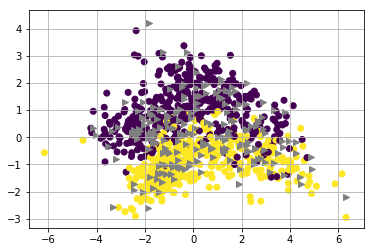

In [5]:
pca = PCA(2)
truncated_train = pca.fit_transform(train_data)
truncated_valid = pca.transform(valid_data)
plt.scatter(truncated_train[:, 0], truncated_train[:, 1], c=train_labels)
plt.scatter(truncated_valid[:, 0], truncated_valid[:, 1], c='gray', marker='>')

plt.grid()

In [6]:
params = {
    'loss_function' : FocalLossObjective(),
    'custom_metric' : ['CrossEntropy', 'Accuracy'],
    'iterations' : 3000,
    'learning_rate' : 0.001,
    'reg_lambda' : 5.0,
    'bagging_temperature' : 1.2,
    'depth' : 5,
    'one_hot_max_size' : 2,
    'rsm' : 0.87,
    'thread_count' : 12
}

In [7]:
clf = CatBoostClassifier(**params)

In [8]:
clf.fit(train_pool, plot=True, eval_set=valid_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6929011	test: 0.6929295	best: 0.6929295 (0)	total: 75.4ms	remaining: 3m 46s
1:	learn: 0.6925514	test: 0.6926144	best: 0.6926144 (1)	total: 96.5ms	remaining: 2m 24s
2:	learn: 0.6922212	test: 0.6922998	best: 0.6922998 (2)	total: 116ms	remaining: 1m 56s
3:	learn: 0.6918052	test: 0.6919552	best: 0.6919552 (3)	total: 136ms	remaining: 1m 41s
4:	learn: 0.6915422	test: 0.6917080	best: 0.6917080 (4)	total: 155ms	remaining: 1m 32s
5:	learn: 0.6913109	test: 0.6914710	best: 0.6914710 (5)	total: 174ms	remaining: 1m 26s
6:	learn: 0.6910384	test: 0.6912264	best: 0.6912264 (6)	total: 192ms	remaining: 1m 22s
7:	learn: 0.6907385	test: 0.6909766	best: 0.6909766 (7)	total: 211ms	remaining: 1m 18s
8:	learn: 0.6904018	test: 0.6906898	best: 0.6906898 (8)	total: 230ms	remaining: 1m 16s
9:	learn: 0.6901038	test: 0.6904087	best: 0.6904087 (9)	total: 249ms	remaining: 1m 14s
10:	learn: 0.6898866	test: 0.6902138	best: 0.6902138 (10)	total: 268ms	remaining: 1m 12s
11:	learn: 0.6896395	test: 0.6899757	be

96:	learn: 0.6647547	test: 0.6671229	best: 0.6671229 (96)	total: 1.98s	remaining: 59.1s
97:	learn: 0.6645737	test: 0.6669363	best: 0.6669363 (97)	total: 2s	remaining: 59.3s
98:	learn: 0.6642746	test: 0.6666560	best: 0.6666560 (98)	total: 2.02s	remaining: 59.3s
99:	learn: 0.6640918	test: 0.6664686	best: 0.6664686 (99)	total: 2.04s	remaining: 59.2s
100:	learn: 0.6637177	test: 0.6661179	best: 0.6661179 (100)	total: 2.06s	remaining: 59.1s
101:	learn: 0.6635219	test: 0.6659206	best: 0.6659206 (101)	total: 2.08s	remaining: 59.1s
102:	learn: 0.6631611	test: 0.6655870	best: 0.6655870 (102)	total: 2.1s	remaining: 59s
103:	learn: 0.6627908	test: 0.6652600	best: 0.6652600 (103)	total: 2.12s	remaining: 58.9s
104:	learn: 0.6624818	test: 0.6649857	best: 0.6649857 (104)	total: 2.13s	remaining: 58.8s
105:	learn: 0.6623024	test: 0.6648006	best: 0.6648006 (105)	total: 2.15s	remaining: 58.8s
106:	learn: 0.6619472	test: 0.6644888	best: 0.6644888 (106)	total: 2.17s	remaining: 58.7s
107:	learn: 0.6616605	te

195:	learn: 0.6396933	test: 0.6438219	best: 0.6438219 (195)	total: 3.86s	remaining: 55.2s
196:	learn: 0.6395188	test: 0.6436422	best: 0.6436422 (196)	total: 3.88s	remaining: 55.2s
197:	learn: 0.6392443	test: 0.6434075	best: 0.6434075 (197)	total: 3.9s	remaining: 55.2s
198:	learn: 0.6389477	test: 0.6431438	best: 0.6431438 (198)	total: 3.92s	remaining: 55.2s
199:	learn: 0.6385965	test: 0.6428486	best: 0.6428486 (199)	total: 3.94s	remaining: 55.1s
200:	learn: 0.6384330	test: 0.6426919	best: 0.6426919 (200)	total: 3.95s	remaining: 55.1s
201:	learn: 0.6381848	test: 0.6424506	best: 0.6424506 (201)	total: 3.97s	remaining: 55s
202:	learn: 0.6378558	test: 0.6421511	best: 0.6421511 (202)	total: 4s	remaining: 55.1s
203:	learn: 0.6375750	test: 0.6419110	best: 0.6419110 (203)	total: 4.02s	remaining: 55.1s
204:	learn: 0.6372366	test: 0.6416182	best: 0.6416182 (204)	total: 4.04s	remaining: 55s
205:	learn: 0.6370531	test: 0.6414418	best: 0.6414418 (205)	total: 4.05s	remaining: 55s
206:	learn: 0.636857

288:	learn: 0.6188402	test: 0.6244334	best: 0.6244334 (288)	total: 5.74s	remaining: 53.9s
289:	learn: 0.6186649	test: 0.6242647	best: 0.6242647 (289)	total: 5.77s	remaining: 53.9s
290:	learn: 0.6184155	test: 0.6240192	best: 0.6240192 (290)	total: 5.79s	remaining: 53.9s
291:	learn: 0.6182230	test: 0.6238346	best: 0.6238346 (291)	total: 5.8s	remaining: 53.8s
292:	learn: 0.6180576	test: 0.6236727	best: 0.6236727 (292)	total: 5.82s	remaining: 53.8s
293:	learn: 0.6178667	test: 0.6234702	best: 0.6234702 (293)	total: 5.84s	remaining: 53.8s
294:	learn: 0.6177044	test: 0.6233142	best: 0.6233142 (294)	total: 5.86s	remaining: 53.7s
295:	learn: 0.6175473	test: 0.6231574	best: 0.6231574 (295)	total: 5.88s	remaining: 53.7s
296:	learn: 0.6172489	test: 0.6228876	best: 0.6228876 (296)	total: 5.89s	remaining: 53.7s
297:	learn: 0.6169747	test: 0.6226407	best: 0.6226407 (297)	total: 5.91s	remaining: 53.6s
298:	learn: 0.6167570	test: 0.6224235	best: 0.6224235 (298)	total: 5.93s	remaining: 53.6s
299:	learn:

384:	learn: 0.5996762	test: 0.6064151	best: 0.6064151 (384)	total: 7.63s	remaining: 51.8s
385:	learn: 0.5993978	test: 0.6061713	best: 0.6061713 (385)	total: 7.65s	remaining: 51.8s
386:	learn: 0.5991638	test: 0.6059676	best: 0.6059676 (386)	total: 7.67s	remaining: 51.8s
387:	learn: 0.5990311	test: 0.6058353	best: 0.6058353 (387)	total: 7.69s	remaining: 51.8s
388:	learn: 0.5988828	test: 0.6056902	best: 0.6056902 (388)	total: 7.71s	remaining: 51.7s
389:	learn: 0.5987355	test: 0.6055372	best: 0.6055372 (389)	total: 7.73s	remaining: 51.7s
390:	learn: 0.5986040	test: 0.6054003	best: 0.6054003 (390)	total: 7.75s	remaining: 51.7s
391:	learn: 0.5984354	test: 0.6052412	best: 0.6052412 (391)	total: 7.78s	remaining: 51.7s
392:	learn: 0.5982854	test: 0.6050944	best: 0.6050944 (392)	total: 7.8s	remaining: 51.7s
393:	learn: 0.5981016	test: 0.6049278	best: 0.6049278 (393)	total: 7.82s	remaining: 51.7s
394:	learn: 0.5979779	test: 0.6048035	best: 0.6048035 (394)	total: 7.84s	remaining: 51.7s
395:	learn:

478:	learn: 0.5812344	test: 0.5892492	best: 0.5892492 (478)	total: 9.55s	remaining: 50.3s
479:	learn: 0.5811200	test: 0.5891398	best: 0.5891398 (479)	total: 9.57s	remaining: 50.3s
480:	learn: 0.5808633	test: 0.5889096	best: 0.5889096 (480)	total: 9.59s	remaining: 50.2s
481:	learn: 0.5806027	test: 0.5886744	best: 0.5886744 (481)	total: 9.62s	remaining: 50.2s
482:	learn: 0.5804635	test: 0.5885264	best: 0.5885264 (482)	total: 9.64s	remaining: 50.2s
483:	learn: 0.5803669	test: 0.5884292	best: 0.5884292 (483)	total: 9.66s	remaining: 50.2s
484:	learn: 0.5801077	test: 0.5881891	best: 0.5881891 (484)	total: 9.68s	remaining: 50.2s
485:	learn: 0.5798725	test: 0.5879745	best: 0.5879745 (485)	total: 9.7s	remaining: 50.2s
486:	learn: 0.5796290	test: 0.5877579	best: 0.5877579 (486)	total: 9.72s	remaining: 50.1s
487:	learn: 0.5793870	test: 0.5875366	best: 0.5875366 (487)	total: 9.73s	remaining: 50.1s
488:	learn: 0.5792485	test: 0.5874027	best: 0.5874027 (488)	total: 9.75s	remaining: 50.1s
489:	learn:

572:	learn: 0.5644712	test: 0.5736615	best: 0.5736615 (572)	total: 11.4s	remaining: 48.3s
573:	learn: 0.5642798	test: 0.5734954	best: 0.5734954 (573)	total: 11.4s	remaining: 48.3s
574:	learn: 0.5641058	test: 0.5733309	best: 0.5733309 (574)	total: 11.5s	remaining: 48.3s
575:	learn: 0.5638985	test: 0.5731581	best: 0.5731581 (575)	total: 11.5s	remaining: 48.3s
576:	learn: 0.5638367	test: 0.5730979	best: 0.5730979 (576)	total: 11.5s	remaining: 48.3s
577:	learn: 0.5637170	test: 0.5729740	best: 0.5729740 (577)	total: 11.5s	remaining: 48.3s
578:	learn: 0.5635031	test: 0.5727751	best: 0.5727751 (578)	total: 11.5s	remaining: 48.3s
579:	learn: 0.5632848	test: 0.5725866	best: 0.5725866 (579)	total: 11.6s	remaining: 48.3s
580:	learn: 0.5630586	test: 0.5723801	best: 0.5723801 (580)	total: 11.6s	remaining: 48.2s
581:	learn: 0.5628492	test: 0.5721911	best: 0.5721911 (581)	total: 11.6s	remaining: 48.2s
582:	learn: 0.5626407	test: 0.5720036	best: 0.5720036 (582)	total: 11.6s	remaining: 48.2s
583:	learn

665:	learn: 0.5499239	test: 0.5600636	best: 0.5600636 (665)	total: 13.3s	remaining: 46.7s
666:	learn: 0.5497042	test: 0.5598566	best: 0.5598566 (666)	total: 13.3s	remaining: 46.7s
667:	learn: 0.5495501	test: 0.5596969	best: 0.5596969 (667)	total: 13.4s	remaining: 46.7s
668:	learn: 0.5493310	test: 0.5594955	best: 0.5594955 (668)	total: 13.4s	remaining: 46.6s
669:	learn: 0.5491631	test: 0.5593345	best: 0.5593345 (669)	total: 13.4s	remaining: 46.6s
670:	learn: 0.5490559	test: 0.5592295	best: 0.5592295 (670)	total: 13.4s	remaining: 46.6s
671:	learn: 0.5488890	test: 0.5590781	best: 0.5590781 (671)	total: 13.4s	remaining: 46.6s
672:	learn: 0.5486810	test: 0.5588906	best: 0.5588906 (672)	total: 13.5s	remaining: 46.5s
673:	learn: 0.5485784	test: 0.5587857	best: 0.5587857 (673)	total: 13.5s	remaining: 46.5s
674:	learn: 0.5484554	test: 0.5586661	best: 0.5586661 (674)	total: 13.5s	remaining: 46.5s
675:	learn: 0.5482532	test: 0.5584809	best: 0.5584809 (675)	total: 13.5s	remaining: 46.5s
676:	learn

757:	learn: 0.5368506	test: 0.5477421	best: 0.5477421 (757)	total: 15.2s	remaining: 45s
758:	learn: 0.5366666	test: 0.5475719	best: 0.5475719 (758)	total: 15.2s	remaining: 45s
759:	learn: 0.5364785	test: 0.5474004	best: 0.5474004 (759)	total: 15.2s	remaining: 44.9s
760:	learn: 0.5363736	test: 0.5472957	best: 0.5472957 (760)	total: 15.3s	remaining: 44.9s
761:	learn: 0.5361815	test: 0.5471206	best: 0.5471206 (761)	total: 15.3s	remaining: 44.9s
762:	learn: 0.5360462	test: 0.5469884	best: 0.5469884 (762)	total: 15.3s	remaining: 44.9s
763:	learn: 0.5359495	test: 0.5469080	best: 0.5469080 (763)	total: 15.3s	remaining: 44.9s
764:	learn: 0.5357813	test: 0.5467517	best: 0.5467517 (764)	total: 15.3s	remaining: 44.8s
765:	learn: 0.5356935	test: 0.5466660	best: 0.5466660 (765)	total: 15.4s	remaining: 44.8s
766:	learn: 0.5356160	test: 0.5465809	best: 0.5465809 (766)	total: 15.4s	remaining: 44.8s
767:	learn: 0.5355222	test: 0.5464921	best: 0.5464921 (767)	total: 15.4s	remaining: 44.8s
768:	learn: 0.

857:	learn: 0.5239766	test: 0.5355921	best: 0.5355921 (857)	total: 17.3s	remaining: 43.1s
858:	learn: 0.5238887	test: 0.5355034	best: 0.5355034 (858)	total: 17.3s	remaining: 43.1s
859:	learn: 0.5238186	test: 0.5354312	best: 0.5354312 (859)	total: 17.3s	remaining: 43.1s
860:	learn: 0.5237234	test: 0.5353385	best: 0.5353385 (860)	total: 17.3s	remaining: 43.1s
861:	learn: 0.5235752	test: 0.5352006	best: 0.5352006 (861)	total: 17.3s	remaining: 43s
862:	learn: 0.5234607	test: 0.5351005	best: 0.5351005 (862)	total: 17.4s	remaining: 43s
863:	learn: 0.5232874	test: 0.5349437	best: 0.5349437 (863)	total: 17.4s	remaining: 43s
864:	learn: 0.5232109	test: 0.5348598	best: 0.5348598 (864)	total: 17.4s	remaining: 43s
865:	learn: 0.5231322	test: 0.5347775	best: 0.5347775 (865)	total: 17.4s	remaining: 42.9s
866:	learn: 0.5230086	test: 0.5346632	best: 0.5346632 (866)	total: 17.4s	remaining: 42.9s
867:	learn: 0.5229149	test: 0.5345792	best: 0.5345792 (867)	total: 17.5s	remaining: 42.9s
868:	learn: 0.5228

952:	learn: 0.5129172	test: 0.5250904	best: 0.5250904 (952)	total: 19.2s	remaining: 41.3s
953:	learn: 0.5128036	test: 0.5249884	best: 0.5249884 (953)	total: 19.2s	remaining: 41.3s
954:	learn: 0.5127263	test: 0.5249085	best: 0.5249085 (954)	total: 19.3s	remaining: 41.3s
955:	learn: 0.5125662	test: 0.5247572	best: 0.5247572 (955)	total: 19.3s	remaining: 41.2s
956:	learn: 0.5124407	test: 0.5246419	best: 0.5246419 (956)	total: 19.3s	remaining: 41.2s
957:	learn: 0.5123529	test: 0.5245579	best: 0.5245579 (957)	total: 19.3s	remaining: 41.2s
958:	learn: 0.5122063	test: 0.5244256	best: 0.5244256 (958)	total: 19.4s	remaining: 41.2s
959:	learn: 0.5120941	test: 0.5243272	best: 0.5243272 (959)	total: 19.4s	remaining: 41.2s
960:	learn: 0.5120167	test: 0.5242524	best: 0.5242524 (960)	total: 19.4s	remaining: 41.1s
961:	learn: 0.5119590	test: 0.5241944	best: 0.5241944 (961)	total: 19.4s	remaining: 41.1s
962:	learn: 0.5118823	test: 0.5241169	best: 0.5241169 (962)	total: 19.4s	remaining: 41.1s
963:	learn

1045:	learn: 0.5024760	test: 0.5151096	best: 0.5151096 (1045)	total: 21.1s	remaining: 39.4s
1046:	learn: 0.5023951	test: 0.5150318	best: 0.5150318 (1046)	total: 21.1s	remaining: 39.4s
1047:	learn: 0.5023395	test: 0.5149709	best: 0.5149709 (1047)	total: 21.2s	remaining: 39.4s
1048:	learn: 0.5021655	test: 0.5148151	best: 0.5148151 (1048)	total: 21.2s	remaining: 39.4s
1049:	learn: 0.5020372	test: 0.5146846	best: 0.5146846 (1049)	total: 21.2s	remaining: 39.4s
1050:	learn: 0.5019497	test: 0.5145935	best: 0.5145935 (1050)	total: 21.2s	remaining: 39.4s
1051:	learn: 0.5018852	test: 0.5145297	best: 0.5145297 (1051)	total: 21.3s	remaining: 39.4s
1052:	learn: 0.5018265	test: 0.5144680	best: 0.5144680 (1052)	total: 21.3s	remaining: 39.4s
1053:	learn: 0.5017357	test: 0.5143796	best: 0.5143796 (1053)	total: 21.3s	remaining: 39.3s
1054:	learn: 0.5016465	test: 0.5143096	best: 0.5143096 (1054)	total: 21.3s	remaining: 39.3s
1055:	learn: 0.5015754	test: 0.5142360	best: 0.5142360 (1055)	total: 21.3s	remai

1143:	learn: 0.4925734	test: 0.5056001	best: 0.5056001 (1143)	total: 23.2s	remaining: 37.6s
1144:	learn: 0.4924289	test: 0.5054701	best: 0.5054701 (1144)	total: 23.2s	remaining: 37.6s
1145:	learn: 0.4923340	test: 0.5053744	best: 0.5053744 (1145)	total: 23.2s	remaining: 37.6s
1146:	learn: 0.4922405	test: 0.5052819	best: 0.5052819 (1146)	total: 23.3s	remaining: 37.7s
1147:	learn: 0.4921085	test: 0.5051602	best: 0.5051602 (1147)	total: 23.3s	remaining: 37.6s
1148:	learn: 0.4920488	test: 0.5050957	best: 0.5050957 (1148)	total: 23.3s	remaining: 37.6s
1149:	learn: 0.4919858	test: 0.5050340	best: 0.5050340 (1149)	total: 23.4s	remaining: 37.6s
1150:	learn: 0.4919162	test: 0.5049653	best: 0.5049653 (1150)	total: 23.4s	remaining: 37.6s
1151:	learn: 0.4918343	test: 0.5048817	best: 0.5048817 (1151)	total: 23.4s	remaining: 37.5s
1152:	learn: 0.4917708	test: 0.5048306	best: 0.5048306 (1152)	total: 23.4s	remaining: 37.5s
1153:	learn: 0.4916510	test: 0.5047102	best: 0.5047102 (1153)	total: 23.4s	remai

1236:	learn: 0.4837336	test: 0.4970464	best: 0.4970464 (1236)	total: 25.3s	remaining: 36s
1237:	learn: 0.4836066	test: 0.4969312	best: 0.4969312 (1237)	total: 25.3s	remaining: 36s
1238:	learn: 0.4835289	test: 0.4968564	best: 0.4968564 (1238)	total: 25.3s	remaining: 36s
1239:	learn: 0.4834490	test: 0.4967837	best: 0.4967837 (1239)	total: 25.3s	remaining: 35.9s
1240:	learn: 0.4833264	test: 0.4966669	best: 0.4966669 (1240)	total: 25.3s	remaining: 35.9s
1241:	learn: 0.4831871	test: 0.4965539	best: 0.4965539 (1241)	total: 25.4s	remaining: 36s
1242:	learn: 0.4831010	test: 0.4964623	best: 0.4964623 (1242)	total: 25.4s	remaining: 35.9s
1243:	learn: 0.4830015	test: 0.4963708	best: 0.4963708 (1243)	total: 25.4s	remaining: 35.9s
1244:	learn: 0.4828891	test: 0.4962608	best: 0.4962608 (1244)	total: 25.5s	remaining: 35.9s
1245:	learn: 0.4827790	test: 0.4961565	best: 0.4961565 (1245)	total: 25.5s	remaining: 35.9s
1246:	learn: 0.4827110	test: 0.4960894	best: 0.4960894 (1246)	total: 25.5s	remaining: 35

1335:	learn: 0.4753141	test: 0.4888926	best: 0.4888926 (1335)	total: 27.3s	remaining: 34.1s
1336:	learn: 0.4751762	test: 0.4887712	best: 0.4887712 (1336)	total: 27.4s	remaining: 34s
1337:	learn: 0.4750690	test: 0.4886708	best: 0.4886708 (1337)	total: 27.4s	remaining: 34s
1338:	learn: 0.4749723	test: 0.4885834	best: 0.4885834 (1338)	total: 27.5s	remaining: 34.1s
1339:	learn: 0.4748866	test: 0.4885025	best: 0.4885025 (1339)	total: 27.5s	remaining: 34s
1340:	learn: 0.4748231	test: 0.4884363	best: 0.4884363 (1340)	total: 27.5s	remaining: 34s
1341:	learn: 0.4748080	test: 0.4884229	best: 0.4884229 (1341)	total: 27.5s	remaining: 34s
1342:	learn: 0.4747459	test: 0.4883656	best: 0.4883656 (1342)	total: 27.5s	remaining: 34s
1343:	learn: 0.4746056	test: 0.4882260	best: 0.4882260 (1343)	total: 27.6s	remaining: 34s
1344:	learn: 0.4745156	test: 0.4881373	best: 0.4881373 (1344)	total: 27.6s	remaining: 33.9s
1345:	learn: 0.4744528	test: 0.4880712	best: 0.4880712 (1345)	total: 27.6s	remaining: 33.9s
13

1432:	learn: 0.4672472	test: 0.4811796	best: 0.4811796 (1432)	total: 29.4s	remaining: 32.2s
1433:	learn: 0.4671713	test: 0.4811058	best: 0.4811058 (1433)	total: 29.4s	remaining: 32.2s
1434:	learn: 0.4671112	test: 0.4810495	best: 0.4810495 (1434)	total: 29.5s	remaining: 32.1s
1435:	learn: 0.4670633	test: 0.4809999	best: 0.4809999 (1435)	total: 29.5s	remaining: 32.2s
1436:	learn: 0.4670106	test: 0.4809438	best: 0.4809438 (1436)	total: 29.5s	remaining: 32.1s
1437:	learn: 0.4668972	test: 0.4808303	best: 0.4808303 (1437)	total: 29.6s	remaining: 32.1s
1438:	learn: 0.4668306	test: 0.4807643	best: 0.4807643 (1438)	total: 29.6s	remaining: 32.1s
1439:	learn: 0.4667027	test: 0.4806391	best: 0.4806391 (1439)	total: 29.6s	remaining: 32.1s
1440:	learn: 0.4666287	test: 0.4805696	best: 0.4805696 (1440)	total: 29.6s	remaining: 32s
1441:	learn: 0.4665198	test: 0.4804706	best: 0.4804706 (1441)	total: 29.6s	remaining: 32s
1442:	learn: 0.4664687	test: 0.4804161	best: 0.4804161 (1442)	total: 29.7s	remaining

1531:	learn: 0.4595660	test: 0.4737012	best: 0.4737012 (1531)	total: 31.5s	remaining: 30.2s
1532:	learn: 0.4594753	test: 0.4736059	best: 0.4736059 (1532)	total: 31.5s	remaining: 30.2s
1533:	learn: 0.4594369	test: 0.4735678	best: 0.4735678 (1533)	total: 31.6s	remaining: 30.2s
1534:	learn: 0.4593840	test: 0.4735083	best: 0.4735083 (1534)	total: 31.6s	remaining: 30.2s
1535:	learn: 0.4592737	test: 0.4733956	best: 0.4733956 (1535)	total: 31.6s	remaining: 30.1s
1536:	learn: 0.4591440	test: 0.4732918	best: 0.4732918 (1536)	total: 31.6s	remaining: 30.1s
1537:	learn: 0.4589856	test: 0.4731612	best: 0.4731612 (1537)	total: 31.7s	remaining: 30.1s
1538:	learn: 0.4589212	test: 0.4730986	best: 0.4730986 (1538)	total: 31.7s	remaining: 30.1s
1539:	learn: 0.4588667	test: 0.4730401	best: 0.4730401 (1539)	total: 31.7s	remaining: 30.1s
1540:	learn: 0.4587860	test: 0.4729720	best: 0.4729720 (1540)	total: 31.7s	remaining: 30s
1541:	learn: 0.4587267	test: 0.4729058	best: 0.4729058 (1541)	total: 31.7s	remaini

1626:	learn: 0.4527454	test: 0.4671974	best: 0.4671974 (1626)	total: 33.6s	remaining: 28.3s
1627:	learn: 0.4526869	test: 0.4671389	best: 0.4671389 (1627)	total: 33.6s	remaining: 28.3s
1628:	learn: 0.4525996	test: 0.4670561	best: 0.4670561 (1628)	total: 33.6s	remaining: 28.3s
1629:	learn: 0.4525172	test: 0.4669771	best: 0.4669771 (1629)	total: 33.6s	remaining: 28.3s
1630:	learn: 0.4524761	test: 0.4669317	best: 0.4669317 (1630)	total: 33.7s	remaining: 28.3s
1631:	learn: 0.4523608	test: 0.4668308	best: 0.4668308 (1631)	total: 33.7s	remaining: 28.3s
1632:	learn: 0.4522951	test: 0.4667685	best: 0.4667685 (1632)	total: 33.8s	remaining: 28.3s
1633:	learn: 0.4521759	test: 0.4666725	best: 0.4666725 (1633)	total: 33.8s	remaining: 28.2s
1634:	learn: 0.4520611	test: 0.4665640	best: 0.4665640 (1634)	total: 33.8s	remaining: 28.2s
1635:	learn: 0.4519817	test: 0.4664866	best: 0.4664866 (1635)	total: 33.8s	remaining: 28.2s
1636:	learn: 0.4518815	test: 0.4663963	best: 0.4663963 (1636)	total: 33.8s	remai

1721:	learn: 0.4458983	test: 0.4606188	best: 0.4606188 (1721)	total: 35.6s	remaining: 26.5s
1722:	learn: 0.4458561	test: 0.4605753	best: 0.4605753 (1722)	total: 35.7s	remaining: 26.4s
1723:	learn: 0.4457600	test: 0.4604783	best: 0.4604783 (1723)	total: 35.7s	remaining: 26.4s
1724:	learn: 0.4457096	test: 0.4604261	best: 0.4604261 (1724)	total: 35.7s	remaining: 26.4s
1725:	learn: 0.4456769	test: 0.4603851	best: 0.4603851 (1725)	total: 35.7s	remaining: 26.4s
1726:	learn: 0.4456246	test: 0.4603329	best: 0.4603329 (1726)	total: 35.8s	remaining: 26.4s
1727:	learn: 0.4455551	test: 0.4602639	best: 0.4602639 (1727)	total: 35.8s	remaining: 26.4s
1728:	learn: 0.4455136	test: 0.4602187	best: 0.4602187 (1728)	total: 35.8s	remaining: 26.3s
1729:	learn: 0.4454434	test: 0.4601600	best: 0.4601600 (1729)	total: 35.9s	remaining: 26.3s
1730:	learn: 0.4453971	test: 0.4601170	best: 0.4601170 (1730)	total: 35.9s	remaining: 26.3s
1731:	learn: 0.4453053	test: 0.4600255	best: 0.4600255 (1731)	total: 35.9s	remai

1813:	learn: 0.4399572	test: 0.4548774	best: 0.4548774 (1813)	total: 37.7s	remaining: 24.7s
1814:	learn: 0.4398544	test: 0.4547713	best: 0.4547713 (1814)	total: 37.7s	remaining: 24.6s
1815:	learn: 0.4398277	test: 0.4547472	best: 0.4547472 (1815)	total: 37.8s	remaining: 24.6s
1816:	learn: 0.4397624	test: 0.4546774	best: 0.4546774 (1816)	total: 37.8s	remaining: 24.6s
1817:	learn: 0.4397176	test: 0.4546320	best: 0.4546320 (1817)	total: 37.8s	remaining: 24.6s
1818:	learn: 0.4396767	test: 0.4545896	best: 0.4545896 (1818)	total: 37.9s	remaining: 24.6s
1819:	learn: 0.4396361	test: 0.4545450	best: 0.4545450 (1819)	total: 37.9s	remaining: 24.6s
1820:	learn: 0.4395994	test: 0.4545063	best: 0.4545063 (1820)	total: 37.9s	remaining: 24.6s
1821:	learn: 0.4395185	test: 0.4544249	best: 0.4544249 (1821)	total: 37.9s	remaining: 24.5s
1822:	learn: 0.4394761	test: 0.4543819	best: 0.4543819 (1822)	total: 38s	remaining: 24.5s
1823:	learn: 0.4394019	test: 0.4543189	best: 0.4543189 (1823)	total: 38s	remaining

1906:	learn: 0.4343502	test: 0.4494709	best: 0.4494709 (1906)	total: 39.8s	remaining: 22.8s
1907:	learn: 0.4343093	test: 0.4494282	best: 0.4494282 (1907)	total: 39.8s	remaining: 22.8s
1908:	learn: 0.4342987	test: 0.4494194	best: 0.4494194 (1908)	total: 39.8s	remaining: 22.8s
1909:	learn: 0.4341992	test: 0.4493231	best: 0.4493231 (1909)	total: 39.9s	remaining: 22.7s
1910:	learn: 0.4341021	test: 0.4492277	best: 0.4492277 (1910)	total: 39.9s	remaining: 22.7s
1911:	learn: 0.4340662	test: 0.4491926	best: 0.4491926 (1911)	total: 39.9s	remaining: 22.7s
1912:	learn: 0.4340234	test: 0.4491474	best: 0.4491474 (1912)	total: 39.9s	remaining: 22.7s
1913:	learn: 0.4339843	test: 0.4491083	best: 0.4491083 (1913)	total: 40s	remaining: 22.7s
1914:	learn: 0.4339305	test: 0.4490581	best: 0.4490581 (1914)	total: 40s	remaining: 22.7s
1915:	learn: 0.4338758	test: 0.4490160	best: 0.4490160 (1915)	total: 40.1s	remaining: 22.7s
1916:	learn: 0.4338362	test: 0.4489762	best: 0.4489762 (1916)	total: 40.1s	remaining

2000:	learn: 0.4291089	test: 0.4444874	best: 0.4444874 (2000)	total: 41.9s	remaining: 20.9s
2001:	learn: 0.4290687	test: 0.4444477	best: 0.4444477 (2001)	total: 41.9s	remaining: 20.9s
2002:	learn: 0.4290291	test: 0.4444061	best: 0.4444061 (2002)	total: 42s	remaining: 20.9s
2003:	learn: 0.4289889	test: 0.4443641	best: 0.4443641 (2003)	total: 42s	remaining: 20.9s
2004:	learn: 0.4289202	test: 0.4442969	best: 0.4442969 (2004)	total: 42s	remaining: 20.8s
2005:	learn: 0.4288498	test: 0.4442238	best: 0.4442238 (2005)	total: 42s	remaining: 20.8s
2006:	learn: 0.4288376	test: 0.4442151	best: 0.4442151 (2006)	total: 42s	remaining: 20.8s
2007:	learn: 0.4287824	test: 0.4441658	best: 0.4441658 (2007)	total: 42s	remaining: 20.8s
2008:	learn: 0.4287345	test: 0.4441124	best: 0.4441124 (2008)	total: 42.1s	remaining: 20.8s
2009:	learn: 0.4286908	test: 0.4440565	best: 0.4440565 (2009)	total: 42.2s	remaining: 20.8s
2010:	learn: 0.4286475	test: 0.4440210	best: 0.4440210 (2010)	total: 42.2s	remaining: 20.8s


2096:	learn: 0.4234076	test: 0.4389989	best: 0.4389989 (2096)	total: 44s	remaining: 19s
2097:	learn: 0.4233517	test: 0.4389435	best: 0.4389435 (2097)	total: 44s	remaining: 18.9s
2098:	learn: 0.4232865	test: 0.4388817	best: 0.4388817 (2098)	total: 44.1s	remaining: 18.9s
2099:	learn: 0.4232599	test: 0.4388567	best: 0.4388567 (2099)	total: 44.1s	remaining: 18.9s
2100:	learn: 0.4232227	test: 0.4388213	best: 0.4388213 (2100)	total: 44.1s	remaining: 18.9s
2101:	learn: 0.4231929	test: 0.4387888	best: 0.4387888 (2101)	total: 44.1s	remaining: 18.9s
2102:	learn: 0.4231635	test: 0.4387680	best: 0.4387680 (2102)	total: 44.1s	remaining: 18.8s
2103:	learn: 0.4230851	test: 0.4386926	best: 0.4386926 (2103)	total: 44.2s	remaining: 18.8s
2104:	learn: 0.4230305	test: 0.4386381	best: 0.4386381 (2104)	total: 44.3s	remaining: 18.8s
2105:	learn: 0.4229950	test: 0.4386079	best: 0.4386079 (2105)	total: 44.3s	remaining: 18.8s
2106:	learn: 0.4229335	test: 0.4385426	best: 0.4385426 (2106)	total: 44.3s	remaining: 

2186:	learn: 0.4188149	test: 0.4345790	best: 0.4345790 (2186)	total: 46.2s	remaining: 17.2s
2187:	learn: 0.4187592	test: 0.4345211	best: 0.4345211 (2187)	total: 46.2s	remaining: 17.2s
2188:	learn: 0.4187184	test: 0.4344743	best: 0.4344743 (2188)	total: 46.2s	remaining: 17.1s
2189:	learn: 0.4186718	test: 0.4344280	best: 0.4344280 (2189)	total: 46.3s	remaining: 17.1s
2190:	learn: 0.4186194	test: 0.4343805	best: 0.4343805 (2190)	total: 46.3s	remaining: 17.1s
2191:	learn: 0.4185668	test: 0.4343286	best: 0.4343286 (2191)	total: 46.3s	remaining: 17.1s
2192:	learn: 0.4185295	test: 0.4342875	best: 0.4342875 (2192)	total: 46.3s	remaining: 17s
2193:	learn: 0.4184974	test: 0.4342513	best: 0.4342513 (2193)	total: 46.4s	remaining: 17.1s
2194:	learn: 0.4184572	test: 0.4342106	best: 0.4342106 (2194)	total: 46.5s	remaining: 17s
2195:	learn: 0.4184066	test: 0.4341599	best: 0.4341599 (2195)	total: 46.5s	remaining: 17s
2196:	learn: 0.4183836	test: 0.4341369	best: 0.4341369 (2196)	total: 46.5s	remaining: 

2282:	learn: 0.4136723	test: 0.4296669	best: 0.4296669 (2282)	total: 48.3s	remaining: 15.2s
2283:	learn: 0.4136250	test: 0.4296167	best: 0.4296167 (2283)	total: 48.3s	remaining: 15.2s
2284:	learn: 0.4135794	test: 0.4295774	best: 0.4295774 (2284)	total: 48.4s	remaining: 15.1s
2285:	learn: 0.4135266	test: 0.4295296	best: 0.4295296 (2285)	total: 48.4s	remaining: 15.1s
2286:	learn: 0.4134823	test: 0.4294897	best: 0.4294897 (2286)	total: 48.4s	remaining: 15.1s
2287:	learn: 0.4134489	test: 0.4294621	best: 0.4294621 (2287)	total: 48.4s	remaining: 15.1s
2288:	learn: 0.4134028	test: 0.4294072	best: 0.4294072 (2288)	total: 48.4s	remaining: 15s
2289:	learn: 0.4133279	test: 0.4293303	best: 0.4293303 (2289)	total: 48.5s	remaining: 15.1s
2290:	learn: 0.4132708	test: 0.4292758	best: 0.4292758 (2290)	total: 48.6s	remaining: 15s
2291:	learn: 0.4132285	test: 0.4292382	best: 0.4292382 (2291)	total: 48.6s	remaining: 15s
2292:	learn: 0.4131582	test: 0.4291697	best: 0.4291697 (2292)	total: 48.6s	remaining: 

2377:	learn: 0.4088351	test: 0.4250072	best: 0.4250072 (2377)	total: 50.5s	remaining: 13.2s
2378:	learn: 0.4088059	test: 0.4249759	best: 0.4249759 (2378)	total: 50.5s	remaining: 13.2s
2379:	learn: 0.4087599	test: 0.4249394	best: 0.4249394 (2379)	total: 50.5s	remaining: 13.2s
2380:	learn: 0.4087251	test: 0.4249058	best: 0.4249058 (2380)	total: 50.5s	remaining: 13.1s
2381:	learn: 0.4086778	test: 0.4248655	best: 0.4248655 (2381)	total: 50.6s	remaining: 13.1s
2382:	learn: 0.4086685	test: 0.4248571	best: 0.4248571 (2382)	total: 50.6s	remaining: 13.1s
2383:	learn: 0.4086096	test: 0.4248020	best: 0.4248020 (2383)	total: 50.6s	remaining: 13.1s
2384:	learn: 0.4085465	test: 0.4247388	best: 0.4247388 (2384)	total: 50.6s	remaining: 13.1s
2385:	learn: 0.4084999	test: 0.4246968	best: 0.4246968 (2385)	total: 50.7s	remaining: 13.1s
2386:	learn: 0.4084739	test: 0.4246684	best: 0.4246684 (2386)	total: 50.8s	remaining: 13s
2387:	learn: 0.4084317	test: 0.4246369	best: 0.4246369 (2387)	total: 50.8s	remaini

2472:	learn: 0.4045834	test: 0.4208946	best: 0.4208946 (2472)	total: 52.6s	remaining: 11.2s
2473:	learn: 0.4045400	test: 0.4208525	best: 0.4208525 (2473)	total: 52.6s	remaining: 11.2s
2474:	learn: 0.4044873	test: 0.4208108	best: 0.4208108 (2474)	total: 52.7s	remaining: 11.2s
2475:	learn: 0.4044612	test: 0.4207833	best: 0.4207833 (2475)	total: 52.7s	remaining: 11.1s
2476:	learn: 0.4044224	test: 0.4207418	best: 0.4207418 (2476)	total: 52.7s	remaining: 11.1s
2477:	learn: 0.4043721	test: 0.4206943	best: 0.4206943 (2477)	total: 52.7s	remaining: 11.1s
2478:	learn: 0.4043322	test: 0.4206553	best: 0.4206553 (2478)	total: 52.7s	remaining: 11.1s
2479:	learn: 0.4042853	test: 0.4206089	best: 0.4206089 (2479)	total: 52.8s	remaining: 11.1s
2480:	learn: 0.4042207	test: 0.4205442	best: 0.4205442 (2480)	total: 52.9s	remaining: 11.1s
2481:	learn: 0.4041834	test: 0.4205059	best: 0.4205059 (2481)	total: 52.9s	remaining: 11s
2482:	learn: 0.4041451	test: 0.4204673	best: 0.4204673 (2482)	total: 52.9s	remaini

2565:	learn: 0.4004673	test: 0.4169154	best: 0.4169154 (2565)	total: 54.8s	remaining: 9.27s
2566:	learn: 0.4004448	test: 0.4168927	best: 0.4168927 (2566)	total: 54.8s	remaining: 9.24s
2567:	learn: 0.4004045	test: 0.4168533	best: 0.4168533 (2567)	total: 54.8s	remaining: 9.22s
2568:	learn: 0.4003959	test: 0.4168462	best: 0.4168462 (2568)	total: 54.8s	remaining: 9.2s
2569:	learn: 0.4003361	test: 0.4167802	best: 0.4167802 (2569)	total: 54.9s	remaining: 9.18s
2570:	learn: 0.4002902	test: 0.4167360	best: 0.4167360 (2570)	total: 54.9s	remaining: 9.16s
2571:	learn: 0.4002802	test: 0.4167281	best: 0.4167281 (2571)	total: 54.9s	remaining: 9.14s
2572:	learn: 0.4002514	test: 0.4166978	best: 0.4166978 (2572)	total: 54.9s	remaining: 9.12s
2573:	learn: 0.4001924	test: 0.4166430	best: 0.4166430 (2573)	total: 54.9s	remaining: 9.09s
2574:	learn: 0.4001696	test: 0.4166232	best: 0.4166232 (2574)	total: 55.1s	remaining: 9.09s
2575:	learn: 0.4001392	test: 0.4165878	best: 0.4165878 (2575)	total: 55.1s	remain

2660:	learn: 0.3968409	test: 0.4133982	best: 0.4133982 (2660)	total: 57s	remaining: 7.25s
2661:	learn: 0.3967852	test: 0.4133431	best: 0.4133431 (2661)	total: 57s	remaining: 7.23s
2662:	learn: 0.3967480	test: 0.4133076	best: 0.4133076 (2662)	total: 57s	remaining: 7.21s
2663:	learn: 0.3967378	test: 0.4133027	best: 0.4133027 (2663)	total: 57s	remaining: 7.19s
2664:	learn: 0.3967117	test: 0.4132772	best: 0.4132772 (2664)	total: 57s	remaining: 7.17s
2665:	learn: 0.3966767	test: 0.4132437	best: 0.4132437 (2665)	total: 57.1s	remaining: 7.15s
2666:	learn: 0.3966429	test: 0.4132115	best: 0.4132115 (2666)	total: 57.1s	remaining: 7.13s
2667:	learn: 0.3965867	test: 0.4131611	best: 0.4131611 (2667)	total: 57.1s	remaining: 7.1s
2668:	learn: 0.3965400	test: 0.4131165	best: 0.4131165 (2668)	total: 57.2s	remaining: 7.09s
2669:	learn: 0.3965085	test: 0.4130845	best: 0.4130845 (2669)	total: 57.2s	remaining: 7.07s
2670:	learn: 0.3964738	test: 0.4130454	best: 0.4130454 (2670)	total: 57.2s	remaining: 7.05s

2754:	learn: 0.3931703	test: 0.4098923	best: 0.4098923 (2754)	total: 59.1s	remaining: 5.26s
2755:	learn: 0.3931621	test: 0.4098850	best: 0.4098850 (2755)	total: 59.1s	remaining: 5.24s
2756:	learn: 0.3931044	test: 0.4098312	best: 0.4098312 (2756)	total: 59.2s	remaining: 5.21s
2757:	learn: 0.3930600	test: 0.4097879	best: 0.4097879 (2757)	total: 59.2s	remaining: 5.19s
2758:	learn: 0.3930063	test: 0.4097422	best: 0.4097422 (2758)	total: 59.2s	remaining: 5.17s
2759:	learn: 0.3929690	test: 0.4097078	best: 0.4097078 (2759)	total: 59.2s	remaining: 5.15s
2760:	learn: 0.3929139	test: 0.4096502	best: 0.4096502 (2760)	total: 59.2s	remaining: 5.13s
2761:	learn: 0.3928825	test: 0.4096213	best: 0.4096213 (2761)	total: 59.3s	remaining: 5.11s
2762:	learn: 0.3928567	test: 0.4095995	best: 0.4095995 (2762)	total: 59.4s	remaining: 5.09s
2763:	learn: 0.3928044	test: 0.4095468	best: 0.4095468 (2763)	total: 59.4s	remaining: 5.07s
2764:	learn: 0.3927447	test: 0.4094936	best: 0.4094936 (2764)	total: 59.4s	remai

2847:	learn: 0.3895433	test: 0.4064041	best: 0.4064041 (2847)	total: 1m 1s	remaining: 3.27s
2848:	learn: 0.3895037	test: 0.4063649	best: 0.4063649 (2848)	total: 1m 1s	remaining: 3.25s
2849:	learn: 0.3894783	test: 0.4063421	best: 0.4063421 (2849)	total: 1m 1s	remaining: 3.23s
2850:	learn: 0.3894334	test: 0.4062962	best: 0.4062962 (2850)	total: 1m 1s	remaining: 3.21s
2851:	learn: 0.3893687	test: 0.4062221	best: 0.4062221 (2851)	total: 1m 1s	remaining: 3.18s
2852:	learn: 0.3893084	test: 0.4061685	best: 0.4061685 (2852)	total: 1m 1s	remaining: 3.16s
2853:	learn: 0.3892761	test: 0.4061349	best: 0.4061349 (2853)	total: 1m 1s	remaining: 3.14s
2854:	learn: 0.3892342	test: 0.4060896	best: 0.4060896 (2854)	total: 1m 1s	remaining: 3.12s
2855:	learn: 0.3891743	test: 0.4060339	best: 0.4060339 (2855)	total: 1m 1s	remaining: 3.1s
2856:	learn: 0.3891298	test: 0.4059928	best: 0.4059928 (2856)	total: 1m 1s	remaining: 3.08s
2857:	learn: 0.3891003	test: 0.4059650	best: 0.4059650 (2857)	total: 1m 1s	remain

2945:	learn: 0.3858324	test: 0.4028829	best: 0.4028829 (2945)	total: 1m 3s	remaining: 1.16s
2946:	learn: 0.3858024	test: 0.4028562	best: 0.4028562 (2946)	total: 1m 3s	remaining: 1.14s
2947:	learn: 0.3857846	test: 0.4028408	best: 0.4028408 (2947)	total: 1m 3s	remaining: 1.12s
2948:	learn: 0.3857459	test: 0.4028016	best: 0.4028016 (2948)	total: 1m 3s	remaining: 1.1s
2949:	learn: 0.3856805	test: 0.4027302	best: 0.4027302 (2949)	total: 1m 3s	remaining: 1.08s
2950:	learn: 0.3856024	test: 0.4026652	best: 0.4026652 (2950)	total: 1m 3s	remaining: 1.06s
2951:	learn: 0.3855316	test: 0.4025958	best: 0.4025958 (2951)	total: 1m 3s	remaining: 1.03s
2952:	learn: 0.3854965	test: 0.4025617	best: 0.4025617 (2952)	total: 1m 3s	remaining: 1.01s
2953:	learn: 0.3854857	test: 0.4025565	best: 0.4025565 (2953)	total: 1m 3s	remaining: 992ms
2954:	learn: 0.3854642	test: 0.4025379	best: 0.4025379 (2954)	total: 1m 3s	remaining: 971ms
2955:	learn: 0.3854402	test: 0.4025116	best: 0.4025116 (2955)	total: 1m 3s	remain